<a href="https://colab.research.google.com/github/jiwoong2/deeplearning/blob/main/Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#https://ko.d2l.ai/chapter_deep-learning-basics/weight-decay.htm
#https://seongyun-dev.tistory.com/52
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sky3000v&logNo=221536661344

# Affine layer

Affine층은 fully-connected layer, dense layer이라고도 불리며 입력된 벡터에 가중치 행렬(weight matrix)를 곱하고 편향(bias)를 더하는 연산을 수행한다. 딥러닝 모델이 역전파(back propagation)을 통해 학습을 진행하면 각 가중치와 편향은 손실함수(loss function)을 최소화하는 최적값을 찾아가게 된다.
\
\
\
Forward

$Y = XW +B$

$ \begin{pmatrix} y_{1} & y_{2} & y_{3} \\ \vdots & \vdots & \vdots \end{pmatrix} = \begin{pmatrix} x_{1} & x_{2} \\ \vdots & \vdots \end{pmatrix} \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}  + \begin{pmatrix} b_{1} & b_{2} & b_{3} \\ \vdots & \vdots & \vdots \end{pmatrix} $

여기서 입력값 X는 2차원 벡터이고 출력값 Y은 3차원벡터이며 위의 수식은 입력값 X의 배치처리를 고려해 확장한 수식이다. 확장된 X행렬은 각행이 배치된 입력값이며 확장된 B행렬은 편향벡터를 배치 수 만큼 각 행에 반복한 행렬이다.(Broadcasting)
\
\
\
Backward

Affine층의 계산그래프는 X와 W의 행렬곱, 그 결과값과 B의 덧셈으로 이루어진다. 주의할 점은 배치처리시 B의 덧셈연산 이전에 Repeat연산(편향벡터를 배치 수 만큼 각행에 반복하는 것)이 추가로 진행된다는 점 이다.
\
\
\
1.덧셈노드의 역전파

흘러들어온 미분이 $\frac{\partial L}{\partial Y}$ 일때 $Y = XW + B$임을 생각해 L에 대한 XW와 B에대한 편미분을 각각 구하면,

$\frac{\partial L}{\partial WX} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial WX}$ 이므로 $\frac{\partial L}{\partial WX} = \frac{\partial L}{\partial Y} * 1$ 이 되고,

$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial B}$ 이므로 $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y} * 1$ 이 된다.
\
\
\
2.행렬곱노드의 역전파

행렬곱노드의 역전파를 이해하기 위해 다음과같은 행렬곱함수 f을 생각한다.

$ \begin{pmatrix} x_1 & x_2 \\ x_3 & x_4 \end{pmatrix} \begin{pmatrix} w_{1} & w_{2} \\ w_{3} & w_{4} \end{pmatrix} = \begin{pmatrix} x_1 w_{1} + x_2 w_{3} & x_1 w_{2} + x_2 w_{4} \\ x_3 w_{1} + x_4 w_{3} & x_3 w_{2} + x_3 w_{4} \end{pmatrix} = \begin{pmatrix} y_1 & y_2 \\ y_3 & y_4 \end{pmatrix} $

여기서 $ \begin{pmatrix} y_1 & y_2 \\ y_3 & y_4 \end{pmatrix} $ 가 손실함수 L에 입력되 최종적으로 스칼라로 반환된다는점을 생각하면 $dL$ 다변수함수의 미분법에 의해

$ dL = \frac{\partial L}{\partial y_1} dy_1 + \frac{\partial L}{\partial y_2} dy_2 + \frac{\partial L}{\partial y_3} dy_3 + \frac{\partial L}{\partial y_4} dy_4$ 로 표현할수 있고, 각각의 $dy_i$들은 다시 $x_i와 w_i$들의 다변수함수 미분법으로 표혈할 수 있을 것이다. 여기서 수식을 줄이기위해 $x_1$에 대한 역전파만 살펴보면 x1의 변화에 대한 각 y원소들의 변화는

$dy_1 = w1,$ $dy_2 = w2,$ $dy_3 = 0,$ $dy_4 = 0$이 된다. 이것을 다시쓰면

$ \frac{\partial L}{\partial x_1} = \frac{\partial L}{\partial y_1} w_1 + \frac{\partial L}{\partial y_2} w_2 $ 로 표현된다. 이방법으로 손실함수 L에 대한 각 X원소들의 편미분을 구해 표시하면(여기서 X는 $x_i$들을 모아놓은 행렬),

$\frac{\partial L}{\partial X} = \begin{pmatrix} \frac{\partial L}{\partial x_1} & \frac{\partial L}{\partial x_2} \\ \frac{\partial L}{\partial x_3} & \frac{\partial L}{\partial x_4} \end{pmatrix} = \begin{pmatrix} \frac{\partial L}{\partial y_1} w_1 + \frac{\partial L}{\partial y_2} w_2 & \frac{\partial L}{\partial y_1} w_3 + \frac{\partial L}{\partial y_2} w_4 \\ \frac{\partial L}{\partial y_3} w_1 + \frac{\partial L}{\partial y_4} w_2 & \frac{\partial L}{\partial y_3} w_3 + \frac{\partial L}{\partial y_4} w_4 \end{pmatrix} = \begin{pmatrix} \frac{\partial L}{\partial y_1} & \frac{\partial L}{\partial y_2} \\ \frac{\partial L}{\partial y_3} & \frac{\partial L}{\partial y_4} \end{pmatrix}  \begin{pmatrix} w_{1} & w_{3} \\ w_{2} & w_{4} \end{pmatrix} = \frac{\partial L}{\partial Y} W^T$

으로 표시할 수 있다.

같은 방법으로 행렬 L에대한 행렬 W의 편미분을 표시하면

$X^T  \frac{\partial L}{\partial Y}$로 표시할 수 있다.
\
\
\
\
3.repeat노드의 역전파

repeat노드는 위의 행렬곱노드의 한 형태로 표현 가능하다. 예를들어 $(x_1, x_2)$를 3번 반복하는 repeat노드는 $(1, 1, 1)^T (x_1, x_2)$ 형태의 행렬곱으로도 표현 가능하다. 이를 이용해 위의 행렬곱노드의 역전파 과정을 진행하면 repeat노드의 역전파를 구할 수 있다.

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W # 가중치 행렬
        self.b = b # bias 벡터

        # 입력된 data 초기화
        self.x = None
        self.original_x_shape = None
        # 가중치와 bias 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1) # 4차원 텐서를 행렬로 변환. -1을 입력하면 reshape 가능한 숫자를 알아서 대입한다.
        self.x = x

        out = np.dot(self.x, self.W) + self.b # affine 변환. bias의 경우 배치처리를 할경우 행렬뎃섬에서 shape이 맞지 않는데 numpy에서 자동으로 벡터를 복사해 각 열에 더하게 된다.

        return out

    def backward(self, dout): # dout:흘러들어온 미분
        dx = np.dot(dout, self.W.T) # data방향 역전파.
        self.dW = np.dot(self.x.T, dout) # weight matrix 방향 역전파.
        self.db = np.sum(dout, axis=0) # bias 방향 역전파. 행렬의 경우 axis 0: 행, 1: 열. 텐서의 경우 axis 0: 각 행렬, 1: 각 행렬의 행, 2: 각 행렬의 열

        dx =dx.reshape(*self.original_x_shape) # 입력데이터. *은 ()와 ,를 없에주지만 없어도 되는 것 같음.

        return dx # 데이터방향으로 미분값을 흘려보내야 다음 노드에서 값을 받아 역전파를 수행할 수 있음.

# Sigmoid layer

Sigmoid layer는 affine layer를 통과한 데이터에 활성화함수(activation function) 중 하나인 sigmoid함수를 적용한다. 활성화함수를 적용하는 이유는 출력값을 비선형적으로 만들어줌으로써 은닉층을 쌓아 깊은 신경망을 구성하기 위해서이다. 선형적인 출력을 내보내는 레이어를 아무리 쌓아도 결국 하나의 레이어로 표현할 수 있기 때문에 활성화함수 없이는 깊은신경망을 구성할 수 없다.
\
\
\
foreward

$f(x) = \frac{1}{1+e^{-x}}$
\
\
\
backward

시그모이드함수의 역전파는 고전적인 미분계산시 매우간단한 수식으로 표현가능하다.

$f(x) = \frac{1}{1+e^{-x}}$ 이고,

$t = 1+e^{-x}$ 일때

$ \frac{df}{dx} = \frac{df}{dt} \frac{dt}{dx}$ 이고,

$\frac{df}{dt} = -t^{-2}, \frac{dt}{dx} = -e^{-x} 이므로$

$ \frac{df}{dx} = \frac{df}{dt} \frac{dt}{dx} = (-t^{-2})(-e^{-x}) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1+e^{-x}-1}{(1+e^{-x})^2} = \frac{1}{1-e^{-x}}-\frac{1}{(1-e^{-x})^2} $

이므로 시그모이드함수 f(x)의 결과값을 y로 치환했을때 시그모이드함수의 미분은

$y(1-y)$으로 표현 가능하다.
\
\
다시 흘러들어온 미분이 $\frac{\partial L}{\partial f}$일때 연쇄법칙에 의한 시그모이드 함수의 역전파는

$\frac{\partial L}{\partial x} = \frac{\partial L}{\partial f} \frac{\partial f}{\partial x} = \frac{\partial L}{\partial f}y(1-y)$로 나타낼 수 있다.


In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x)) # 시그모이드 함수를 그대로 표현.
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # 위의 결과를 그대로 표현.
        return dx

시그모이드 함수의 기울기 소멸(vanashing gradient) 문제

활성화 함수를 사용한다고 깊은 신경망을 구성하는데 발생하는 모든 문제점을 해결할 수 있는 것은 아니다. 특히 시그모이드함수로 깊은 신경망을 구성하면 vanashing gradient라는 심각한 문제가 발생한다.

밑의 두번째 그래프는 시그모이드함수의 기울기를 나타낸다. 살펴보면 최댓값이 0.25에 불과하고 x값이 작아지거나 커지면 급격히 0으로 수렴하는것을 알 수 있다. 이런 시그모이드함수의 특성때문에 층이 깊어질수록 체인룰에의해 시그모이드함수의 미분값이 계속해서 곱해지게되고 결과적으로 그값은 급격히 작아져 모델 학습이 불가능하게 되는데 이를 gradient vanashing이라고 한다.

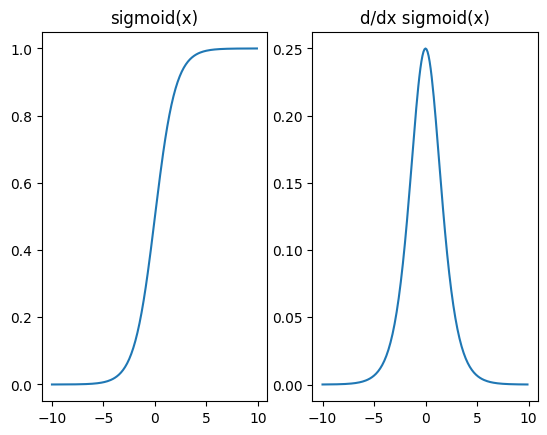

In [ ]:
# sigmoid함수와 기울기 그래프 그리기.

sigmoid = Sigmoid()
x = np.arange(-10, 10, 0.1)
y1 = sigmoid.forward(x)
y2 = sigmoid.forward(x) * (1 - sigmoid.forward(x))
plt.subplot(121)
plt.title("sigmoid(x)")
plt.plot(x,y1)
plt.subplot(122)
plt.title("d/dx sigmoid(x)")
plt.plot(x,y2)
plt.show

# Relu layer

Relu layer는 affin층을 통과한 데이터에 활성화함수중 하나인 relu함수를 적용한다. relu함수는 0을포함한 0보다작은 값은 0으로, 0보다큰값은 그대로 출력하는 함수이다.
 relu함수를 사요하면 sigmoid함수의 gradient vanashing문제를 극복할 수 있고, 간단한 함수인 만큼 모델학습속도가 매우 빠르다는 장점이 있다.
 하지만 단점도 있는데, 음수값을 입력받으면 무조건 0을 반환하고 기울기또한 0이기 때문에 가중치업데이트가 안되는 현상이 발생할 수 있다. 이런 현상을 죽어가는 렐루현상?이라고 한다.
\
\
\
forward
\
\
$ y = \begin{cases} x, & x>0 \\ 0, & x<=0  \end{cases} $
\
\
\
backward
\
\
밑의 그래프를 보면 함수의 그래프가 매우 간단하므로 쉽게 기울기를 구할 수 있다.
\
\
$ \frac{\partial y}{\partial x} = \begin{cases} 1, & x>0 \\ 0, & x<=0 \end{cases}$

(*원래 0에서는 미분이 불가능 하다.)

즉 relu layer의 역전파는 체인룰에 의해 흘러들어온 미분에 0이나 1을 곱하는 과정이 된다.


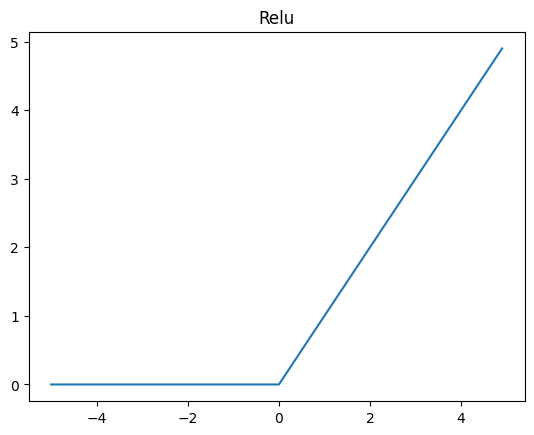

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # self.mask는 0보다 크면 false 0보다 작으면 true인 리스트를 반환한다.
        out = x.copy()
        out[self.mask] = 0 # mask true인 부분을 모두 0으로 반환한다.

        return out

    def backward(self, dout):
        dout[self.mask] = 0 # 주의할점은 흘러들어온 미분값의 부호에 의해 1이나 0을 곱하는것이 정해지는게 아니라 위의 x값을 기준으로 gradient를 살리거나 죽이게 된다.
        dx = dout

        return dx

In [ ]:
# Relu함수 그래프 그리기

relu = Relu()
x = np.arange(-5, 5, 0.1)
y = relu.forward(x)

plt.plot(x, y)
plt.title('Relu')
plt.show

# Softmax with Loss layer

1.Softmax

softmax함수는 입력벡터를 확률벡터(확률 분포)로 변환한다. 예를들어 모델이 1부터 10까지의 숫자 이미지를보고 어떤숫자인지 예측할때 소프트맥스 함수는 입력이미지가 각 숫자일 확률을 벡터로 표현할 수 있다. 당연히 확률벡터의 모든 원소의 합은 1이 된다.
\
\
\
forward
\
\
$ softmax(x^i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} $
\
\
softmax함수가 단순히 $ \frac{x_i}{\sum_{j=1}^{n} x_j} $ 로 표현되지 않고 굳이 자연상수 e를 사용해 표현되는 이유는 우선 지수 함수를 사용해 입력값의 차이를 더 명확하게 하기위함이고 또, backpropagation과정에서 미분계산을 더 용이하게 하기 위해서 이다.
\
\
\
2.Cross entropy

크로스엔트로피는 모델에서 예측한 확률값이 실제값과 비교했을 때 틀릴 수 있는 정보량을 의미한다. 크로스 엔트로피를 이해하기위해 우선 엔트로피를 살펴보자. 엔트로피는 불확실성(정보량)을 의미하며

$H(x) = \sum_{i=1}^{n} log \frac{1}{p_i} p_i$ 로 표현된다. 엔트로피를 이산 확률변수의 기댓값을 표현하는 식 $ E(X)=\sum_{j=1}^{n} x_i p_i $와 비교하면 모양이 비슷한데 $log \frac{1}{p_i}$를 정보량이라고 생각하고 확률변수 $x_i$에 대입하면 엔트로피를 정보량에대한 기댓값이라고 이해할 수 있다.

* $log \frac{1}{p_i}$를 정보량이라고 표현하는 이유는 정보량의 정의를 생각해보면 납득된다. 정보량은 일어날 확률이 낮을수록 높음으로 확률의 역수를 취한다. 그리고 독립적인 정보량을 동시에 갖는경우 단순히 두 정보량을 더하면 될 것 이다. 그럼으로 다시 $log$를 취함으로써 정보량을 표현할 수 있다.

다시 크로스 엔트로피를 돌아오면 크로스엔트로피는 엔트로피 공식을 약간 변형해
$H(P,Q)= \sum_{i=1}^{n} log \frac{1}{q_i} p_i$로 표현된다. 여기서 Q는 틀릴 수 있는 정보이고 P는 실제 어떤 정보의 확률이다. 즉 크로스엔트로피는 틀릴수 있는정보를 가지고 구한 엔트로피이다.
\
\
\
forward
\
\
$H(P,Q)= \sum_{i=1}^{n} log \frac{1}{q_i} p_i$
\
\
\
3.Softmax with Cross Entropy

역전파에서 Softmax함수와 Cross Entropy는 각각 미분하는 것 보다 합성함수로 생각해 미분하는것이 훨씬 간단한식을 도출할 수 있으므로 한덩어리로 처리한다.
\
\
\
backward

우선 3차원 벡터가 Softmax층과 Cross Entropy층을 차례로 통과하는 과정을 생각한다.

$(a_1, a_2, a_3)$ --> Softmax --> $(y_1, y_2, y_3)$ --> Cross Entropy --> L

L을 $(a_1, a_2, a_3)$에 대한 식으로 나타내보면,

$L(a_1,a_2,a_3) = -t_1 log y_1 -t_2log y_2 -t_3 logy_3 = $
\
\
$ -t_1 log \frac{e^{a_1}}{e^{a_1}+ e^{a_2}+ e^{a_3}} -t_2 log \frac{e^{a_2}}{e^{a_1}+ e^{a_2}+ e^{a_3}} -t_3 log \frac{e^{a_3}}{e^{a_1}+ e^{a_2}+ e^{a_3}} =$
\
\
$-t_1 log e^{a_1} -t_2 log e^{a_2} -t_3 log e^{a_3} + (t_1 + t_2 + t_3) log(e^{a_1} + e^{a_2} + e^{a_3}) = $
\
\
$-t_1 a_1 -t_2 a_2 -t_3 a_3 + log(e^{a_1} + e^{a_2} + e^{a_3})$
\
\
으로 정리된다. 이제 각 a원소의 편미분을 나타내면,

$\frac{\partial L}{\partial a_i} = -t_i + \frac{e^{a_i}}{e^{a_1}+ e^{a_2}+ e^{a_3}} = -t_i + y_i$ 가 되고 이를 모두 구해 L에 대한 a의 미분을 구하면,
\
\
$\frac{\partial L}{\partial a} = (y_1 - t_1, y_2 - t_2, y_3 - t_3) = y-t$
\
\
이 된다. 두 층을 한덩어리로 생각하면 복잡한 미분과정을 뺄셈연산으로 간단히 만들 수 있다.

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None #손실함수
        self.y = None # softmax의 출력(확률 벡터)
        self.t = None # 정답 레이블(one-hot encoding 형태)

    def forward(self, x,  t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.corss_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout = 1): # 역전파의 시작은 1 이다.
        batch_size = self.t.shape[0]

        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩이 돼어 있는 경우.
            dx = (self.y - self.t) / batch_size # 손실함수의 정의 값은 각각의 손실함수값의 평균이므로 배치사이즈로 나누어 준다.

        else: # 원-핫 인코딩이 돼어 있지 않은 경우.
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1 # 도출된 확률벡터는 배치처리로 묶여있다는 것을 생각해보면 위와 같은 결과를 도출함.
            dx = dx / batch_size

            return dx

    def cross_entropy_error(y, t):
        if y.ndim == 1: # y가 벡터인 경우, 배치처리를 안 한 경우
            t = t.reshape(1, t.size) # 10차원 벡터를 행렬로 변환.(개념상.)
            y = y.reshape(1, y.size)

        if t.size == y.size: # 라벨이 원-핫 인코딩이 돼어 있다면, 그러니까 입력 값이 10차원 벡터라면, size함수는 메트릭스의 원소갯수를 반환한다.
            t = t.argmax(axis=1) # 최댓값의 인덱스를 반환한다.(원-핫 인코딩 이전으로 되돌리기 위해 작성.

        batch_size = y.shape[0]

        return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size # 확률벡터로 이루어진 행렬에서 알맞은 인덱스를 얻기위한 과정. 배치처리시 곱셈노드(나누기)도 생각해야한다.

    def softmax(x):
        if x.ndim == 2:   # x가 행렬일 경우, 즉 배치처리를 해서 각 행이 확률벡터인 메트릭스를 입력받은 경우.
            x = x.T # 각 행이 확률벡터인 초기 메트릭스에서 각 열이 확률벡터인 메트릭스로 전치 시킨다.(브로드캐스팅 기능을 활용하기 위한 과정)
            x = x - np.max(x, axis = 0) # np.max(x, axis = 0)는 각 열에 대한 최댓값을 저장한 리스트(벡터)를 반환 한다.
                                        # 그리고 x에 대한 - 연산은 각 열의 확률벡터에 각 열의 최댓값을 빼주는 연산이다.(밑의 오버플로우 방지를 위한 최댓값 빼기와 같음.)
            y = np.exp(x) / np.sum(np.exp(x), axis = 0) # 브로드캐스팅

            return y.T

        x = x - np.max(x) # 오버플로를 방지하기위해 작성.

        return np.exp(x) / np.sum(np.exp(x))

# Batch Normalization layer

Batch Normalization 층은 각 행이 data인 배치행렬의 각 열(data의 feature로 이해)을 평균이 0이고 표주편차가 1인 정규분포로 변환한 후 머신이 최적의 scailing:$\gamma$ 와 shift:$\beta$를 찾아 적용하게 한다. 최종적으로 배치처리된 data의 각 featur는 표준편차가 $\gamma$ 평균이 $\beta$인 분포를 가지게 된다.
\
\
Batch Normalization 층을 사용하는 이유
\
1.데이터 값의 범위차가 클 경우 데이터 간 편차가 큰 feature 위주로 학습이 진행되게 되는데 정규화로 범위차를 줄이면 모든 feature을 골고루 학습할 수 있게 된다.

2.Internal Covariate Shift 해결. Internal Covariate Shift란 입력값의 분포가 각 층마다 다르게 나타나는 현상을 뜻 한다. 이런 현상이 나타나면 학습속도가 느려지고 학습률같은 하이퍼파라미터의 설정이 까다로워지는데 Batch Normalization층을 추가하면 이런현상을 보정할 수 있다.
\
\
\
Forward
\
\
우선 3차원 벡터로 표현된 deta 3개가 배치처리 되어 있다고 가정해 보자.

$ data = \begin{pmatrix} 1 & -1 & 3 \\ 2 & -2 & 1 \\ 3 & -3 & 2  \end{pmatrix}$

그리고 각 열의 평균을 0으로 만들기 위해 각 열의 평균을 구한뒤 각 열의 원소들에 빼주면,

$ \mu(각 열의 평균) = (2, -2, 2)$


$ data - \mu = \begin{pmatrix} -1 & 1 & 1 \\ 0 & 0 & -1 \\ 1 & -1 & 0  \end{pmatrix}$ 이 되고, 각 열의 표준편차를 1로 만들어주기 위해 우선 각열의 표준편차를 구하면,

$ \alpha (각 열의 표준편차) = (1, 1, 1) $이고, 이를 각 열의 원소들에 나눠 표준편차를 1로 만들어준다.(이미 표준편차가 1이기 때문에 생략.)

이렇게 데이터를 정규분포로 만든 후엔 다시 표준편차를 $\gamma$로 평균을$\beta$로 만들어주기 위해 다음과 같은 연산을 진행한다.

$ \begin{pmatrix} 1 & -1 & 3 \\ 2 & -2 & 1 \\ 3 & -3 & 2  \end{pmatrix} \begin{pmatrix} \gamma_1 \\ \gamma_2 \\ \gamma_3 \end{pmatrix} + \begin{pmatrix} \beta_1 & \beta_2 & \beta_3 \end{pmatrix} $

여기서 $\gamma와 \beta$는 모델에 의하여 학습되며 최적의값을 찾아가게된다.
\
\
\
Backward

복잡하므로 이미지로 대체.

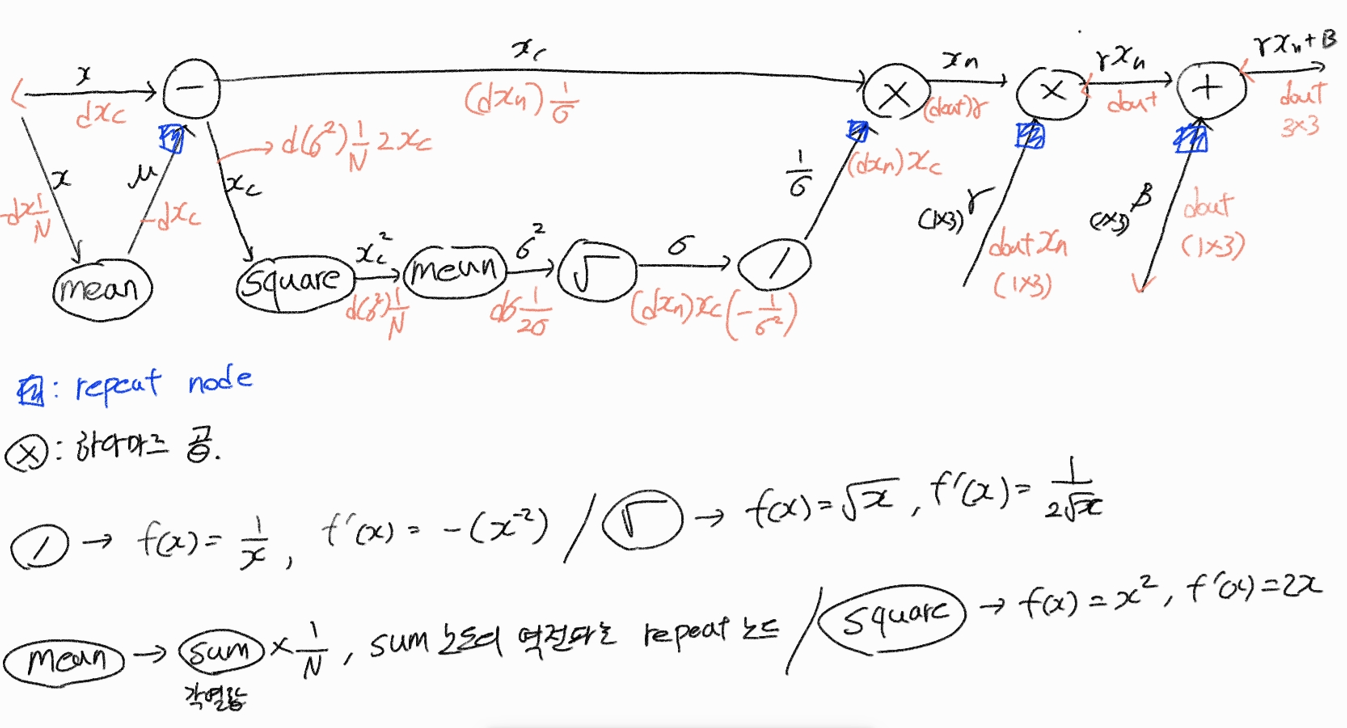

In [ ]:
class BatchNormalization:

    def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None): # gamma와 beta는 머신이 학습해 최적값을 찾지만 초기값을 설정해 줘야 한다.
                                                                                              # running_mean = None, running_var = None : 학습중엔 각 배치행렬(data 묶음)의 열(feature)을 사용해
                                                                                              # 평균과, 분산을 구해 사용하지만 학습이 끝난후엔 학습하는 동안의 전체 훈련용 data의 평균과 분산(비슷한 값?)
                                                                                              # 을 사용해 normalizetion 한다.
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원

        # test용 평균, 분산
        self.running_mean = running_mean
        self.running_var = running_var

        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg = True): # x는 입력 data, train_flag : 위의 주석처럼 훈련시와 test시의 순전파방식이 다르기 때문에 훈련시 train_flg를 True로 지정해 이를 구분한다.
        self.input_shape = x.shape
        if x.ndim != 2: # 행렬이 아니면. 지금까지는 data를 flatten한후 배치처리 했기때문에 인풋이 행렬이었지만, cnn등에서는 data를 faltten시키지 않기때문에 행렬이 아니라 텐서가 입력된다.
                        # N은 배치사이즈, C는 채널, H는 세로해상도, W는 가로해상도
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)

        return out.reshape(*self.input_shape) # shape을 원래대로 복원한다. *는 ()를 없에준다.

    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)

        if train_flg: # 훈련시.
            mu = x.mean(axis = 0) # 열의 평균
            xc = x - mu # 각 열의 평균이 0이 됨.
            var = np.mean(xc**2, axis = 0) # 분산
            std = np.sqrt(var + 10e-7) # 표준편차
            xn = xc / std # 각 열의 표준편차가 1이됨.

            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu # RMSProp에서 사용한 기법처럼 평균벡터를 계속해서 내분하는 과정. 결과적으로 계속해서 바뀌는 배치묶음의 평균 추세를 따라간다.
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var

        else: # train_flg가 false일 경우 즉, test시에는 running_mean와 running_var을 사용한다.
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))

        out = self.gamma * xn + self.beta # gamma를 곱해 표준편차를 조정하고 beta를 더해 평균을 조정한다.

        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)

        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis = 0) # 덧셈노드를  브로드캐스팅(repeat 노드를 통과)방식으로 계산하기때문에 덧셈노드의 역전파뿐 아니라 repeat노드의 역전파인 sum노드를 추가해야한다.
        dgamma = np.sum(self.xn * dout, axis = 0) # *는 adamard  product임.
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar # 흘러들어온 미분이 2개일경우 두 미분을 합해준다.
        dmu = np.sum(dxc, axis = 0) # -를 생략하고 밑의 연산에서 뺄셈연산을 함.
        dx = dxc - dmu / self.batch_size

        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx

# Dropout layer

Overfitting을 억제하기 위해 뉴런을 무작위로 삭제하여 신호전달을 차단한다.

In [ ]:
class Dropout:

    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg = True): # Dropout층은 훈련시에만 적용함.
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio # .rand는 0부터 1까지의 균등분포로 랜덤값을 생성함. self.mask는 true, false로 이루어진 행렬이 됨.
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio) # 신호량을 맞추기위해 리스케일링. 이해안감.

    def backward(self, dout):
        return dout * self.mask # 신호를 죽인부분은 미분도 죽임.

overfitting을 방지하기위한 또 다른  대표적인 방법으로 weight decay(가중치 감쇠)가 있다.

모델복잡도는 모델이 얼마나 많은 정보를 학습할 수 있는지 나타내는 지표이다. weight의 norm이 커진다는 것은 weight행렬의 각원소 값이 커진다는 것 이고, 이는 모델이 학습할 수 있는 범위가 커짐을 의미한다. 곧 모델의 복잡도가 올라가는 것 이다. 모델의 복잡도가 커지면 overfitting의 가능성이 커진다. 정리하면 가중치를 감쇠(weight decay)시키면 모델의 복잡도를 낮추고 overfitting을 방지할 수 있는 것 이다.
\
\
\
\
L1(Lasso) regularization : $L(새로운 손실함수) = L_c + L_p$

여기서 $L_c$는 크로스엔트로피를 의미한다. 즉 원래의 손실함수이다. 뒤에 더해진 $L_p$는 패널티를 의미한다. 즉 규제이다. L1 regularization의 $L_p$는 다음과 같다.

$L_p = \lambda \sum_{j = 0}^{M}|W_j| $

여기서 $\lambda$는 가중치 감소 비율이다.
\
\
$L1$ 규제를 가한 손실함수를 사용해 weight matirx를 경사하강법으로 학습시키는 과정을 생각하면,

$W - \eta (\frac{\partial L_c}{\partial W} + \lambda sgn(W), sgn(w) = \begin{cases} 1, w>0 \\ 0, w=0 \\ -1, w<0 \end{cases}  $로 나타낼 수 있다.

의미를 생각해보면 각 가중치값 크기에 상관없이 가중치 값이 양수면 $ \eta \lambda $만큼 빼주고, 가중치 값이 음수이면 $ \eta \lambda $만큼 더해주게 된다. 이를 통해 L1규제는 가중치의 전체적인 범위를 축소하고 특정 feature을 0으로 만들어 모델의 복잡도를 낮출 수 있다.

\
\
\
L2(Ribge) regularization : $L = L_c + L_p$

여기서 패널티 $L_p$는 다음과 같다.

$L_p = \frac{\lambda}{2} \sum_{j = 0}^{M}W_j^2 $

$L2\$ 규제를 가한 손실함수를 사용해 weight matirx를 경사하강법으로 학습시키는 과정을 생각하면,

$ W - \eta (\frac{\partial L_c}{\partial W} + \lambda W)$로 나타낼 수 있다.

의미를 생각해보면  L1규제와 달리 가중치의 크기에따라 규제정도가 달라진다는 것을 알 수있다. L2규제는 가중치가 클수록 더 크게 감소 시킨다.

# Convoulution layer

Convolution layer는 합성곱을 통해 이미지의 feature을 추출할 수 있다. 예를들어 100x100이미지가 있고, 5x5 필터가 있다면 필터로 이미지를 훓어가며 frobenius inner product하는 방식이다. 이런 방식을 사용하는 이유는 이미지를 다순 affine층으로 학습시킬 경우 발생하는 문제 때문이다. 이미지를 affine층으로 학습시킬 경우 이미지를 flatten시키는 과정에서 픽셀들의 locality 정보 를 잃게되고 이로 인해 이동, 확대, 회전 같은 변환에 취약해진다. 또 고해상도의 이미지 경우 prameter수가 너무 많아져 계산비용이 커지고 overfitting이 발생할 위험도 커진다. Convolution layer를 사용하면 이런문제점들을 해결할 수 있다.
Convolution layer는 im2col -> affine -> reshape층으로 세분화해 생각할 수 있다. 각 과정을 자세히 살펴보면.
\
\
\
1.im2col
\
\
대부분의 이미지가 컬러이미지임을 생각해보면 Convolution layer는 대부분 4차원 Tensor에 대해 연산하게 된다. 이를 구현하려면 코드가 복잡하고 내적연산이 너무 많을 경우 시간도 오래걸릴 뿐 아니라 이해하기에 직관적이지도 않다.
im2col은 4차원 Tensor를 2차원 matrix로 바꾸어 익숙한 선형대수를 사용할 수 있게 해주고 복잡한 내적연산을 한번의 행렬연산으로 처리해 속도를 높일 수 있다. 단, 중복되는 픽셀이 있기때문에 메모리 자원을 더 차지하는 문제가 있으나 이는 줄어드는 시간비용(약 200배)에 비하면 감수할만 하다.
\
예로 3x3 이미지 행렬과 2x2 필터를 생각해 보면.(padding 0, stride 1)

$ x(이미지) = \begin{pmatrix} x1 & x2 & x3 \\ x4 & x5 & x6 \\ x7 & x8 & x9  \end{pmatrix}$, $ w(필터) = \begin{pmatrix} w1 & w2 \\ w3 &w4 \end{pmatrix} $

이에 im2col을 적용하면,

$ x = \begin{pmatrix} x1 & x2 & x4 & x5 \\ x2 & x3 & x5 & x6 \\ x4 & x5 & x7 & x8 \\ x5 & x6 & x8 & x9  \end{pmatrix} $, $ w = \begin{pmatrix} w1 \\ w2 \\ w3 \\ w4 \end{pmatrix}$ 이 되고,

이를 행렬곱 연산후 특정 방식으로 reshpae하면 합성곱연산을 한 결과와 동일한 결과를 얻을 수 있다.
\
\
\
2.affien

im2col과정을 거치면 익숙한 행렬형태를 얻으므로 기존의 affine 과정을 이용한다.
\
\
\
3.reshpae
affine연산의 결과는 행렬형태이므로

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # 중간 데이터（backward 시 사용）
        self.x = None
        self.col = None
        self.col_W = None

        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout): # convolution층은 im2col -> affine -> reshape층으로 세분화해 생각할 수 있다.
        FN, C, FH, FW = self.W.shape

        # reshape층의 역전파 재배열의 역전파는 역재배열이다. 최종적으로 행렬이 반환된다.
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        # affine층의 역전파. (가중치에 대한 미분)
        self.db = np.sum(dout, axis=0) # 각 열을 합하는 이유는 파이썬의 브로드캐스팅에 의해 편향을 더할때 리피트노드가 숨어있기 때문이다. (리피트의 역전파는 sum)
        self.dW = np.dot(self.col.T, dout)

        # 필터를 가중치행렬로 만드는 과정의 역전파.
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        # affine층 역전파. (데이터에 대한 미분)
        dcol = np.dot(dout, self.col_W.T)
        # im2col층의 역전파
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

# Max Pooling layer

Max pooling층은 특성맵을 다운샘플링해 특성맵의 크기를 줄이는 풀링연산을 수행한다. 풀링연산도 합성곱과 마찬가지로 커널(필터)와 stride 개념을 가진다. Max Pooling은 커널과 겹치는 영역안에서 최대값을 추출하는 방식으로 특성맵을 다운샘플링 한다. 합성곱과 다른점은 채널을 없에는 합성곱 연산과 달리 채널별로 독립시행한다는 점 이다. 즉 입력값이 N * C * H * W 라면 출력은 N * C * OH * OW 이다. Max Pooing층은 다음 합성곱층이 더 빨리 글로벌한 특징을 찾을 수 있게 하고, parameter의 숫자를 줄여 계산비용을 줄이고 모델의 복잡도를 낮춰 overfitting을 억제 한다.

Max pooling 층은 개념은 간단하지만 연산속도등의 이유로 실제 구현시에는 im2col을 사용해 연산하므로 코드가 복잡해진다.

1. 데이터에 im2col을 취한다.
2. 열이 PH*PW가 되도록 reshape을 한다.
3. 각 행에 최대를 취한다.
4. N*OH*OW*C로 reshape을 한다.
5. transpose(0,3,1,2)를 취한다.

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        # im2col
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # 열이 PH*PW가 되도록 reshpae
        col = col.reshape(-1, self.pool_h*self.pool_w)
        # 역전파시 필요한 과정
        arg_max = np.argmax(col, axis=1)
        # 각행의 최대값을 추출
        out = np.max(col, axis=1)
        # NOHOW*C로 reshape -> transpose(0,3,1,2)를 취한다.
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        # 순전파를 그대로 거슬러 올라가며 각 과정에 역전파를 적용한다.

        # transpose
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        # 영행렬 생성. .size는 행렬의 원소 개수를 반환함.
        dmax = np.zeros((dout.size, pool_size))
        # 영행렬의 순전파시 최대지점 자리에 미분을 대입.
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        # reshape
        dmax = dmax.reshape(dout.shape + (pool_size,))
        # col2im
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.

    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]